# matplotlib可视化练习

In [15]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [16]:
mpl.rc('figure',figsize=(12,9))
mpl.rc('font',size=15)
mpl.rc('axes.spines',top=False, right=False)

## 练习4：泰坦尼克号海难幸存状况分析
* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
* 不同性别的幸存比例（堆积柱状图）
* 幸存和遇难乘客的票价分布（分类箱式图）
* 幸存和遇难乘客的年龄分布（分类箱式图）
* 不同上船港口的乘客仓位等级分布（分组柱状图）
* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
* 幸存和遇难乘客父母子女的数量分布（分类箱式图）
* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

In [131]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）

In [135]:
def pile_bar(data,pile_col,clsf_col):
    data1 = data.groupby([pile_col,clsf_col])['survived'].count()
    data1 = data1.unstack()
    data1 = data1/data1.sum()
    x_data = range(len(data1.columns))
    q = pd.Series([0 for i in x_data])
    bottom = q
    colors = ['#539caf', '#7663b0','darkorange']
    _,axe = plt.subplots()
    for c,p in zip(colors,data1.index):
        bottom +=q
        plt.bar(x_data, data1.loc[p],bottom=bottom,label=p,width=0.15*len(data1.columns),color=c)
        q = data1.loc[p].reset_index()[p]
    plt.xlabel(data1.columns.name,fontsize=20)
    plt.xticks(x_data,data1.columns, fontsize=15)
    plt.ylabel('passengers survived',fontsize=20)
    plt.legend(fontsize=15)
    axe.spines['top'].set_color(None)
    axe.spines['right'].set_color(None)

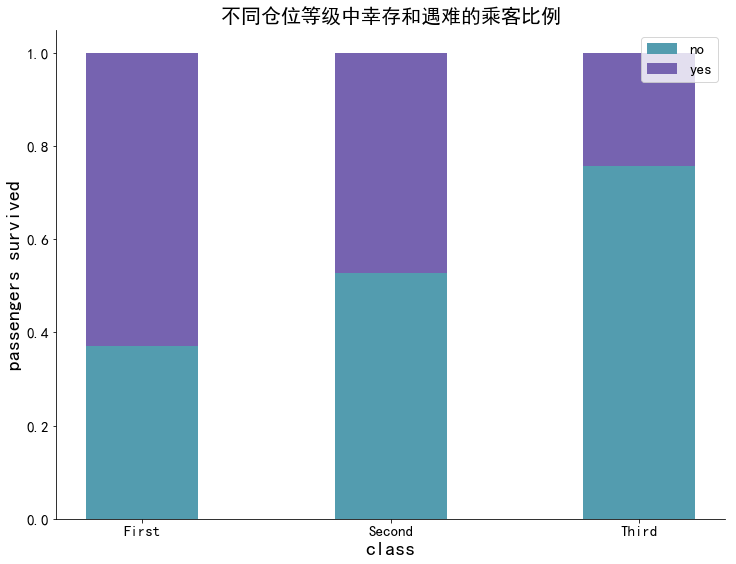

In [136]:
pile_bar(data,'alive','class')
plt.title(u'不同仓位等级中幸存和遇难的乘客比例',fontsize=20)

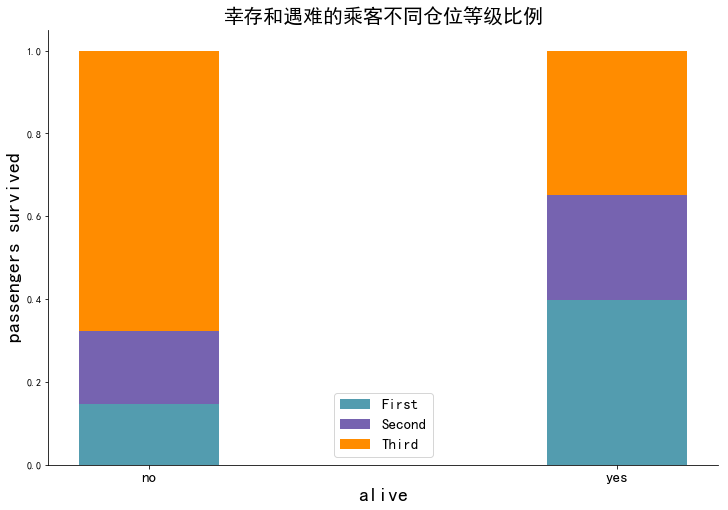

In [55]:
pile_bar(data,'class','alive')
plt.title(u'幸存和遇难的乘客不同仓位等级比例',fontsize=20)

* 不同性别的幸存比例（堆积柱状图）

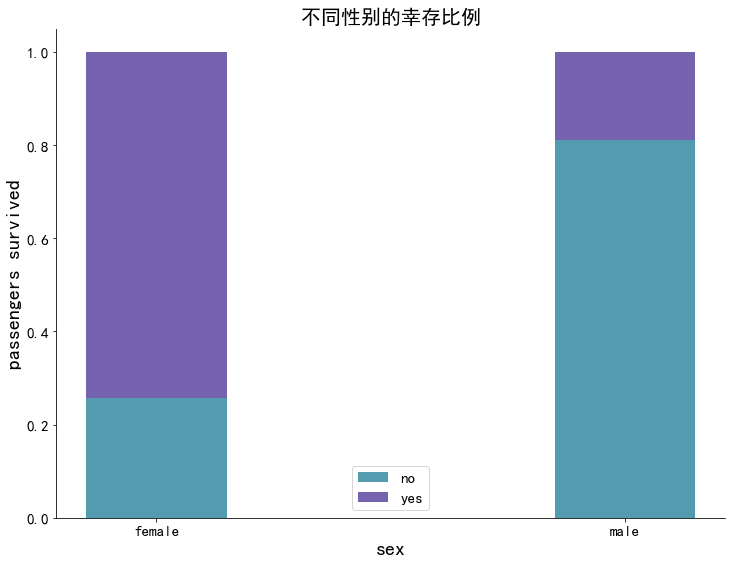

In [138]:
pile_bar(data,'alive','sex')
plt.title(u'不同性别的幸存比例',fontsize=20)

* 幸存和遇难乘客的票价分布（分类箱式图）

In [139]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


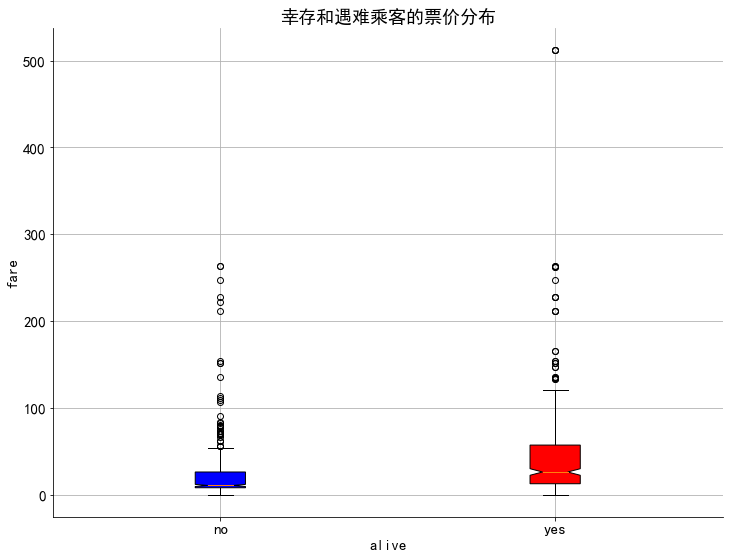

In [145]:
multi_box(data,'fare','alive')
plt.title(u'幸存和遇难乘客的票价分布')

* 幸存和遇难乘客的年龄分布（分类箱式图）

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [142]:
data_clean = data[['age','alive']].dropna()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 2 columns):
age      714 non-null float64
alive    714 non-null object
dtypes: float64(1), object(1)
memory usage: 16.7+ KB


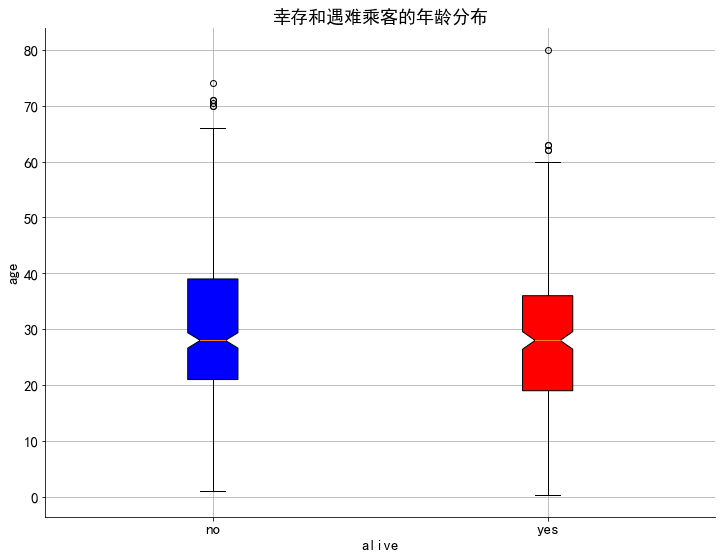

In [146]:
multi_box(data_clean,'age','alive')
plt.title(u'幸存和遇难乘客的年龄分布')

* 不同上船港口的乘客仓位等级分布（分组柱状图）

In [147]:
def multi_bar(data,multi_col,clsf_col):
    data1 = data.groupby([multi_col,clsf_col])['survived'].count()
    data1 = data1.unstack()
    x_data = range(len(data1.columns))
    x_data = pd.Series(x_data)
    width = 0.2
    xmean = x_data.mean()
    
    for i,p in enumerate(data1.index):
        plt.bar(x_data+width*(i-xmean),data1.loc[p],label=p,width=width)
    
    plt.xlabel(data1.columns.name,fontsize=15)
    plt.xticks(x_data,data1.columns)
    plt.ylabel('passengers',fontsize=15)
    plt.legend()

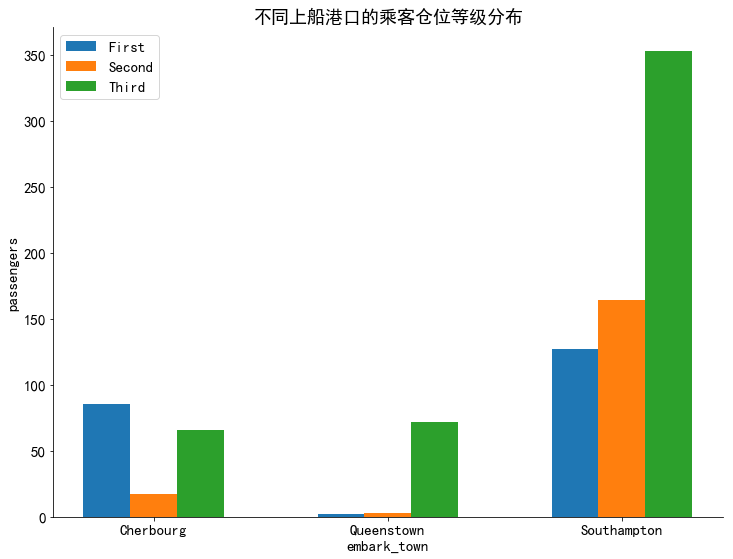

In [151]:
multi_bar(data,'class','embark_town')
plt.title(u'不同上船港口的乘客仓位等级分布')

* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）

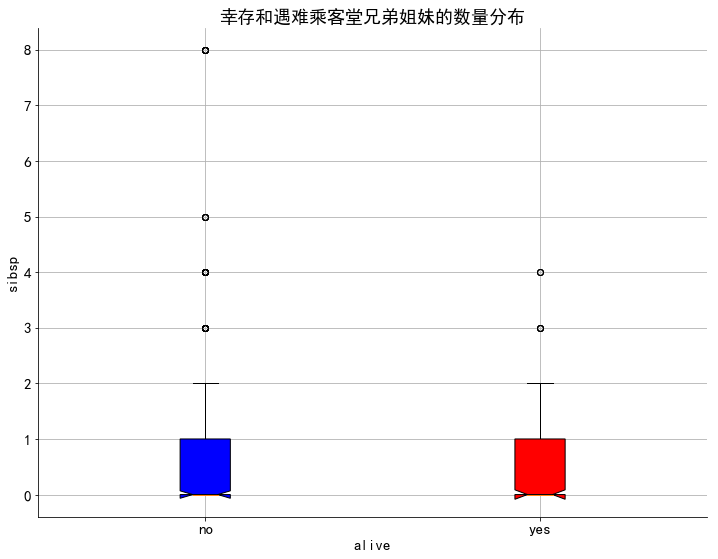

In [152]:
multi_box(data,'sibsp','alive')
plt.title(u'幸存和遇难乘客堂兄弟姐妹的数量分布')

* 幸存和遇难乘客父母子女的数量分布（分类箱式图）

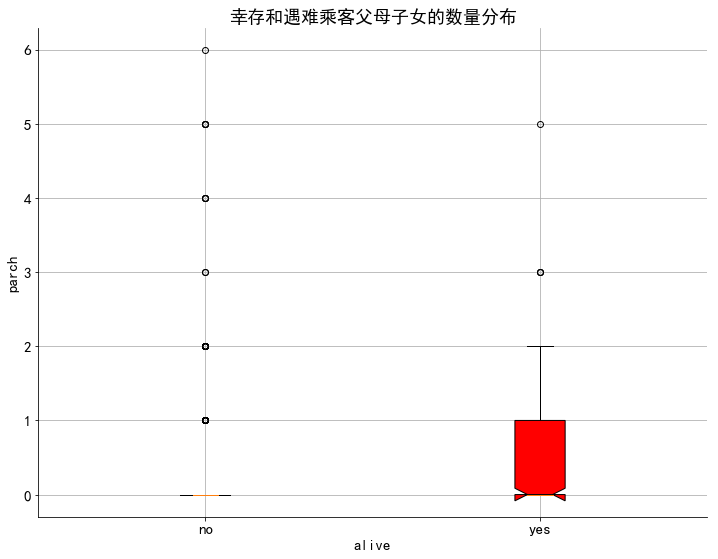

In [153]:
multi_box(data,'parch','alive')
plt.title(u'幸存和遇难乘客父母子女的数量分布')

* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

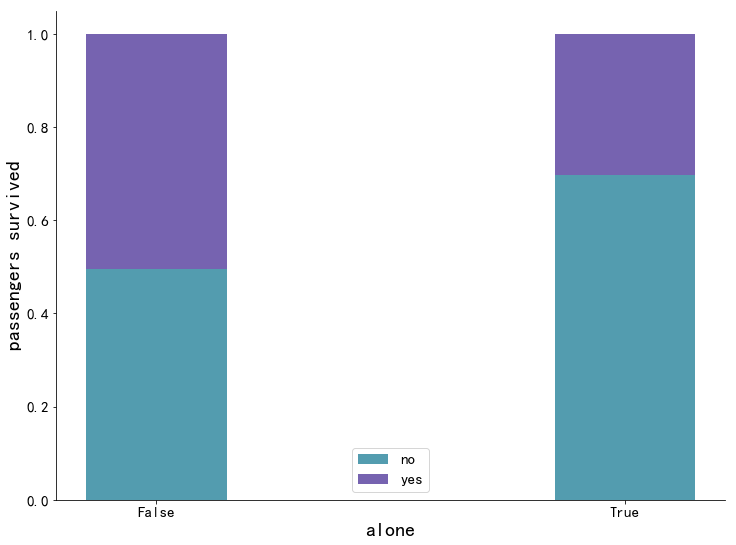

In [154]:
pile_bar(data,'alive','alone')

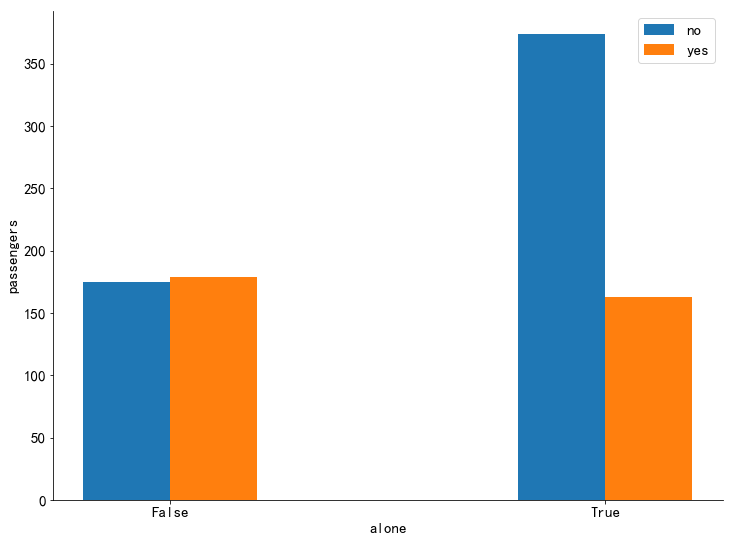

In [155]:
multi_bar(data,'alive','alone')